In [11]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

**Load Data**

In [3]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 112s 1us/step


In [17]:
X_test.shape

(10000, 32, 32, 3)

In [37]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


In [39]:
y_train.shape

(50000,)

In [41]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [43]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [45]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

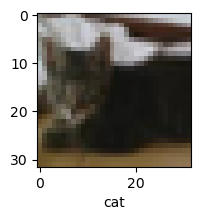

In [55]:
plot_sample(X_train,y_train,9)

**Normailze Data**

In [63]:
X_train = X_train / 255
X_test = X_test/255

**Trying Dense ANN**

In [68]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid'),
])

ann.compile(optimizer='SGD',
             loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train,y_train,epochs=5)




Epoch 1/5


1563/1563 [==============================] - 54s 34ms/step - loss: 1.8099 - accuracy: 0.3525
Epoch 2/5
1563/1563 [==============================] - 54s 35ms/step - loss: 1.6225 - accuracy: 0.4284
Epoch 3/5
1563/1563 [==============================] - 54s 35ms/step - loss: 1.5390 - accuracy: 0.4578
Epoch 4/5
1563/1563 [==============================] - 53s 34ms/step - loss: 1.4789 - accuracy: 0.4785
Epoch 5/5
1563/1563 [==============================] - 53s 34ms/step - loss: 1.4290 - accuracy: 0.4979


In [70]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 1.4342 - accuracy: 0.4914


[1.4342321157455444, 0.49140000343322754]

In [84]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report :\n",classification_report(y_test,y_pred_classes) )

313/313 [==============================] - 2s 6ms/step
Classification Report :
               precision    recall  f1-score   support

           0       0.59      0.50      0.54      1000
           1       0.55      0.68      0.61      1000
           2       0.41      0.34      0.37      1000
           3       0.37      0.32      0.34      1000
           4       0.52      0.30      0.38      1000
           5       0.41      0.33      0.37      1000
           6       0.51      0.56      0.53      1000
           7       0.50      0.63      0.55      1000
           8       0.50      0.74      0.59      1000
           9       0.52      0.53      0.53      1000

    accuracy                           0.49     10000
   macro avg       0.49      0.49      0.48     10000
weighted avg       0.49      0.49      0.48     10000



**CNN Neural Network**

In [87]:
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters=32, kernel_size=(3,3),activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    #dense
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax'),
])

cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

cnn.fit(X_train,y_train,epochs=10)


Epoch 1/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.4549 - accuracy: 0.4766
Epoch 2/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1222 - accuracy: 0.6080
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0004 - accuracy: 0.6533
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9183 - accuracy: 0.6804
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8406 - accuracy: 0.7091
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7806 - accuracy: 0.7279
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7274 - accuracy: 0.7473
Epoch 8/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6816 - accuracy: 0.7637
Epoch 9/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6402 - accuracy: 0.7770
Epoch 10/10
1563/1563 [==============================] - 9s 5ms/step - loss: 0.

In [89]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.9153 - accuracy: 0.6994


[0.9153445363044739, 0.699400007724762]

In [95]:
y_test = y_test.reshape(-1,)
y_test[:3]

array([3, 8, 8], dtype=uint8)

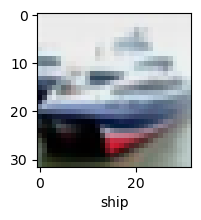

In [97]:
plot_sample(X_test,y_test,1)

In [105]:
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
y_pred_classes[:5]

313/313 [==============================] - 1s 2ms/step


[3, 1, 1, 0, 4]

In [107]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

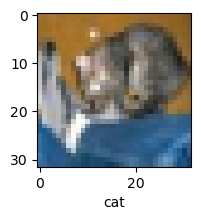

In [113]:
plot_sample(X_test,y_test,0)

In [115]:
classes[y_pred_classes[0]]

'cat'

In [117]:
print("Classification Report: \n", classification_report(y_test,y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.72      0.74      1000
           1       0.79      0.80      0.80      1000
           2       0.64      0.58      0.60      1000
           3       0.53      0.50      0.52      1000
           4       0.67      0.64      0.66      1000
           5       0.63      0.58      0.60      1000
           6       0.68      0.82      0.75      1000
           7       0.79      0.72      0.75      1000
           8       0.74      0.85      0.79      1000
           9       0.75      0.78      0.77      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000

